<a href="https://colab.research.google.com/github/jeonggunlee/DeepLearningBasics/blob/master/Lab04_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###한림대학교 소프트웨어 융합 대학

##누구나 즐기는 딥러닝: 오픈소스 Keras를 활용하여!!!

이정근 교수

jeonggun.lee@hallym.ac.kr 2020년 1월


---
## IMDB 리뷰 감성 분류하기

imdb의 데이터 로딩 화일이 이전 버전의 numpy를 활용하기 때문에, 이전 numpy 버전 (1.16.2)을 새롭게 설치함

이를 위하여 다음 명령어를 수행

**!pip install numpy==1.16.2**


In [0]:
!pip install numpy==1.16.2

    100% |████████████████████████████████| 17.3MB 2.3MB/s 
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3


In [0]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
# 영화 리뷰는 X_train에, 감성 정보는 y_train에 저장된다.

Using TensorFlow backend.


In [0]:
print(X_train.shape)
print(X_test.shape)

(25000,)
(25000,)


In [0]:
print('훈련 데이터: {}'.format(len(X_train)))
print('테스트 데이터: {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리: {}'.format(num_classes))

훈련 데이터: 25000
테스트 데이터: 25000
카테고리: 2


In [0]:
print(X_train[0])
print(len(X_train[0]))
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218
1


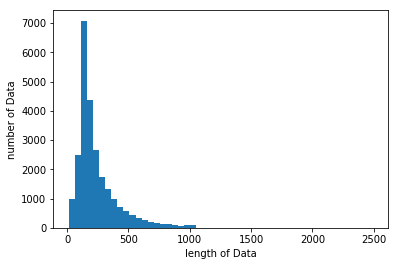

In [0]:
import matplotlib.pyplot as plt

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [0]:
word_index = imdb.get_word_index()
index_to_word={}
for key, value in word_index.items():
    index_to_word[value] = key

1646592/1641221 [==============================] - 1s 0us/step


In [0]:
print(index_to_word[1])

the


In [0]:
print(index_to_word[3941])

journalist


In [0]:
print(' '.join([index_to_word[X] for X in X_train[0]]))

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw